In [16]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [17]:

test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPED_FITHRF_GLMDENOISE_RR.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPEC_FITHRF_GLMDENOISE.npy'
fs_dir = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc3/sourcedata/freesurfer'


test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#onoffR2 = test_data['onoffR2']
R2 = test_data['R2']
meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
HRFindex = test_data['HRFindex']
#fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print(betas.shape)
# #switch the first and second dimension
# betas = np.swapaxes(betas,0,1)

betamean = np.mean(betas,axis=3)
print(betamean.shape)





HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
(85, 102, 87, 1440)
(85, 102, 87)


/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '
/tank/zhangs/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



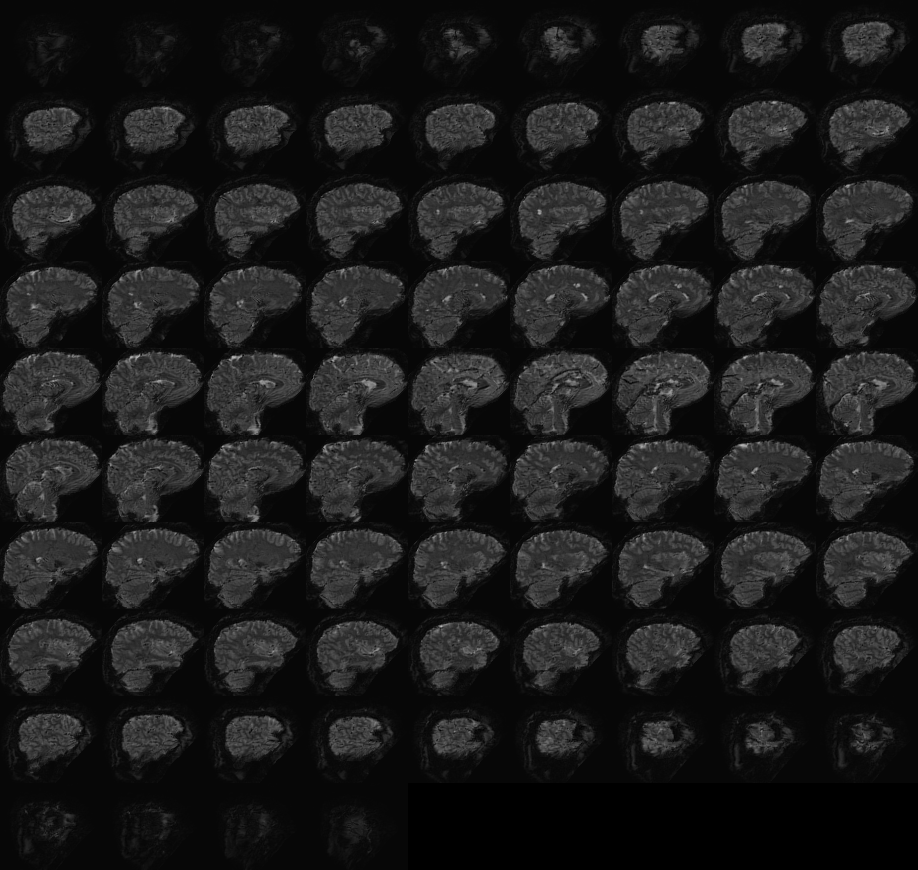
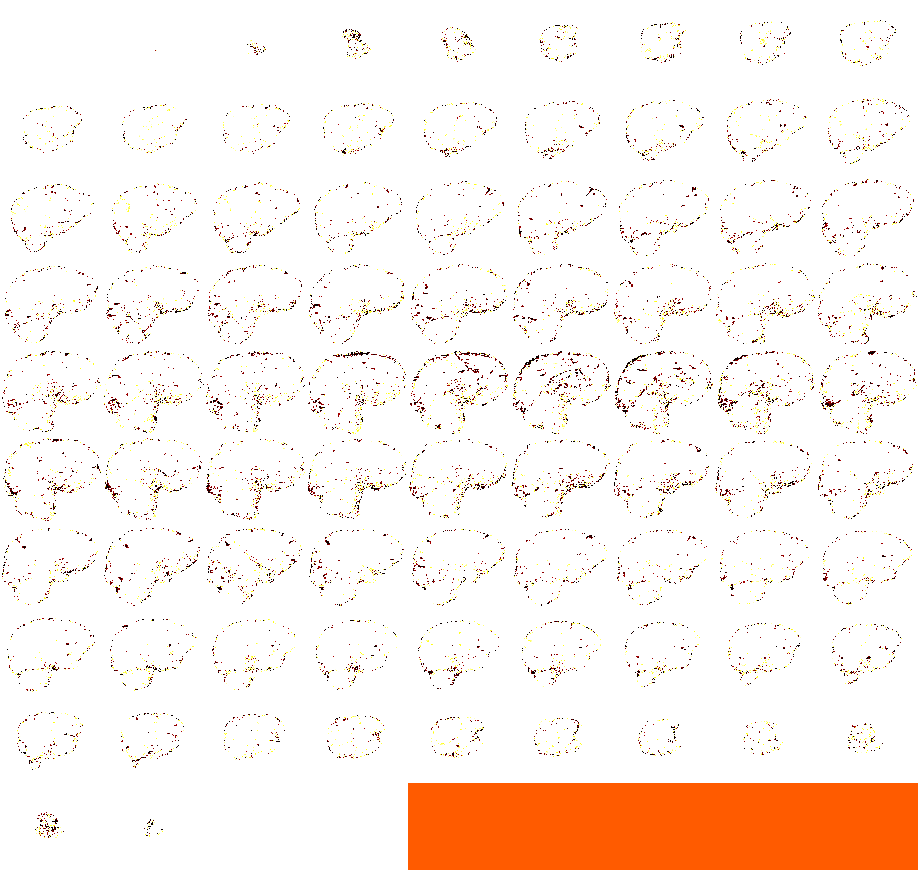

In [18]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc3/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc3/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc3/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2)
R2_masked[bmask] = R2[bmask]
betamean_masked = np.zeros_like(betamean)
betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)
#R2_img.to_filename('72_R2.nii.gz')
#
view_img(R2_img, threshold=20, vmax=50, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)